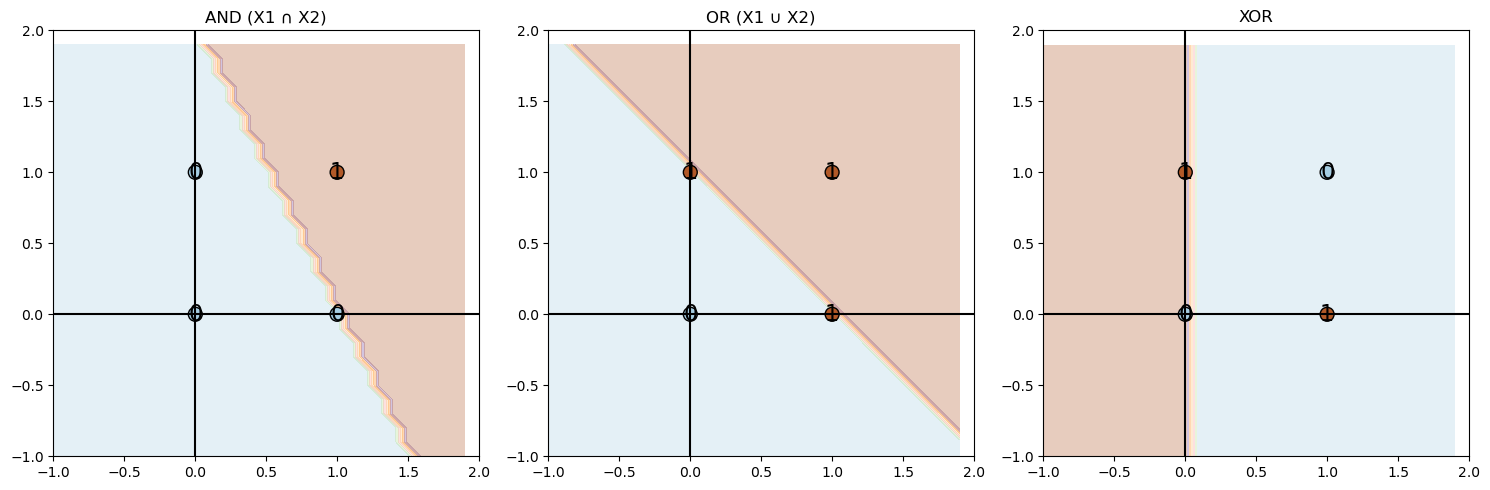

In [8]:
# ==========================================================
# Maestría en Ciencia y Análisis de Datos
# Universidad Mayor de San Andrés
# ----------------------------------------------------------
#           Machine Learning y Deep Learning
# ----------------------------------------------------------
#        Rolando Gonzales Martinez, Agosto 2024
# ==========================================================
#         Perceptron simple y problema XOR
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, tasa_aprendizaje=0.1, epocas=10):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.epocas = epocas
        self.pesos = None
        self.sesgo = None

    def funcion_activacion(self, x):
        return 1 if x >= 0 else 0

    def entrenar(self, X, y):
        muestras, caracteristicas = X.shape
        self.pesos = np.zeros(caracteristicas)
        self.sesgo = 0

        for _ in range(self.epocas):
            for idx, x_i in enumerate(X):
                salida_lineal = np.dot(x_i, self.pesos) + self.sesgo
                y_predicho = self.funcion_activacion(salida_lineal)

                # Regla de actualización del perceptrón
                actualizacion = self.tasa_aprendizaje * (y[idx] - y_predicho)
                self.pesos += actualizacion * x_i
                self.sesgo += actualizacion

    def predecir(self, X):
        salida_lineal = np.dot(X, self.pesos) + self.sesgo
        y_predicho = [self.funcion_activacion(i) for i in salida_lineal]
        return np.array(y_predicho)

def graficar_frontera_decision(X, y, perceptron, titulo):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = perceptron.predecir(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.Paired)

    # Añadir las líneas de los ejes
    plt.axvline(x=0, color='black')
    plt.axhline(y=0, color='black')
    plt.xlim([-1, 2])
    plt.ylim([-1, 2])

    for i, txt in enumerate(y):
        plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=16, color='black',
                     ha='center', va='center')

    plt.title(titulo)

# Datos de entrada para los problemas AND, OR y XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron(tasa_aprendizaje=0.1, epocas=10)
perceptron_and.entrenar(X, y_and)

# OR
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron(tasa_aprendizaje=0.1, epocas=10)
perceptron_or.entrenar(X, y_or)

# XOR
y_xor = np.array([0, 1, 1, 0])
perceptron_xor = Perceptron(tasa_aprendizaje=0.1, epocas=10)
perceptron_xor.entrenar(X, y_xor)

# Configurar la figura para mostrar gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico AND
plt.sca(axes[0])
graficar_frontera_decision(X, y_and, perceptron_and, "AND (X1 ∩ X2)")

# Gráfico OR
plt.sca(axes[1])
graficar_frontera_decision(X, y_or, perceptron_or, "OR (X1 ∪ X2)")

# Gráfico XOR
plt.sca(axes[2])
graficar_frontera_decision(X, y_xor, perceptron_xor, "XOR")

plt.tight_layout()
plt.show()
